In [2]:
from nilearn import datasets
from nilearn.decomposition import CanICA
from nilearn import plotting
from nilearn import image 
from nilearn.decomposition import DictLearning
from nilearn.input_data import NiftiSpheresMasker, NiftiMasker
import numpy as np 
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter

D:\anaconda\anaconda\envs\mne\lib\site-packages\nilearn\datasets\__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [3]:
rest_dataset = datasets.fetch_development_fmri(n_subjects=30)
func_filenames = rest_dataset.func 

In [4]:
canica = CanICA(n_components=20, verbose=10, mask_strategy='template', random_state=0)
canica.fit(func_filenames)

# Retrieve the independent components in brain space. Directly
# accesible through attribute `components_img_`.
canica_components_img = canica.components_img_
# components_img is a Nifti Image object, and can be saved to a file with
# the following line:
canica_components_img.to_filename('canica_resting_state.nii.gz')

[MultiNiftiMasker.fit] Loading data from [C:\Users\kumad\nilearn_data\development_fmri\development_fmri\sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,
 C:\Users\kumad\nilearn_data\development_fmri\development_fmri\sub-pixar124_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,
 C:\Users\kumad\nilearn_data\development_fmri\development_fmri\sub-pixar125_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,
 C:\Users\kumad\nilearn_data\development_fmri\development_fmri\sub-pixar126_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,
 C:\Users\kumad\nilearn_data\development_fmri\development_fmri\sub-pixar127_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,
 C:\Users\kumad\nilearn_data\development_fmri\development_fmri\sub-pixar128_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,
 C:\Users\kumad\nilearn_data\development_fmri\development_fmri\sub-pixar001_task-pixar_space-MNI152NLin2009cAsym_desc-preproc

D:\anaconda\anaconda\envs\mne\lib\site-packages\nilearn\image\resampling.py:273: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn("Resampling binary images with continuous or "


[MultiNiftiMasker.transform] Resampling mask
[CanICA] Loading data
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('C:\Users\kumad\nilearn_data\development_fmri\development_fmri\sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('C:\Users\kumad\nilearn_data\development_fmri\development_fmri\sub-pixar124_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


KeyboardInterrupt: 

D:\anaconda\anaconda\envs\mne\lib\site-packages\nilearn\plotting\displays.py:101: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),
D:\anaconda\anaconda\envs\mne\lib\site-packages\nilearn\plotting\displays.py:101: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(data_2d.copy(),
D:\anaconda\anaconda\envs\mne\lib\site-packages\numpy\ma\core.py:2829: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


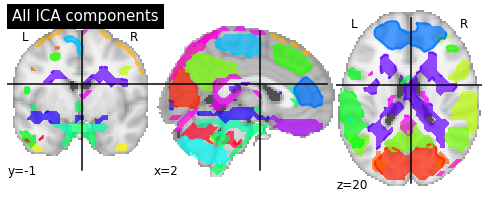

In [5]:
# Plot all ICA components together
plotting.plot_prob_atlas(canica_components_img, title='All ICA components')

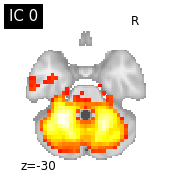

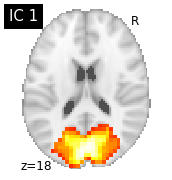

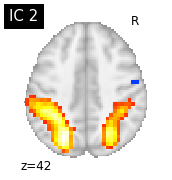

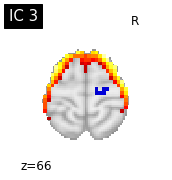

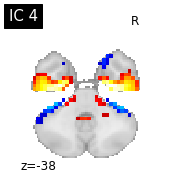

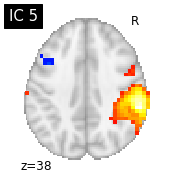

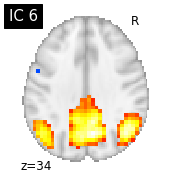

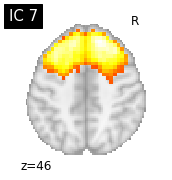

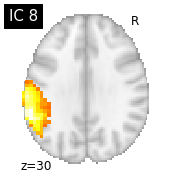

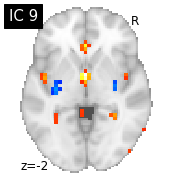

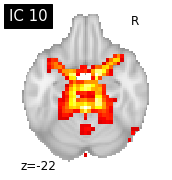

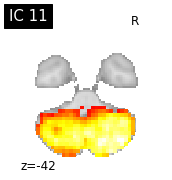

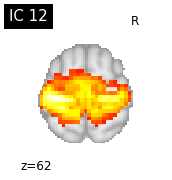

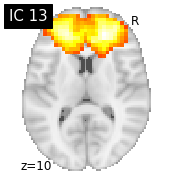

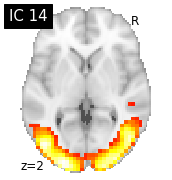

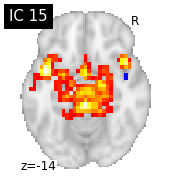

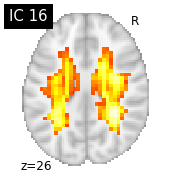

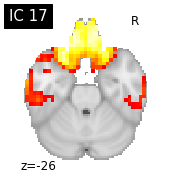

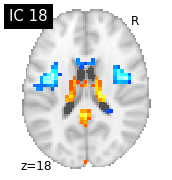

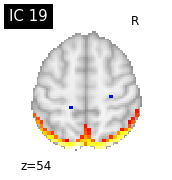

In [7]:
for i, cur_img in enumerate(image.iter_img(canica_components_img)):
    plotting.plot_stat_map(cur_img, display_mode="z", title="IC %d" % i,
                  cut_coords=1, colorbar=False)

In [8]:
dict_learning = DictLearning(n_components=20,
                             random_state=0,
                             n_epochs=1,
                             mask_strategy='template')

print('[Example] Fitting dicitonary learning model')
dict_learning.fit(func_filenames)
print('[Example] Saving results')
# Grab extracted components umasked back to Nifti image.
# Note: For older versions, less than 0.4.1. components_img_
# is not implemented. See Note section above for details.
dictlearning_components_img = dict_learning.components_img_
#dictlearning_components_img.to_filename('dictionary_learning_resting_state.nii.gz')

[Example] Fitting dicitonary learning model


D:\anaconda\anaconda\envs\mne\lib\site-packages\nilearn\image\resampling.py:273: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn("Resampling binary images with continuous or "


[Example] Saving results


D:\anaconda\anaconda\envs\mne\lib\site-packages\nilearn\image\image.py:1054: FutureWarning: The parameter "sessions" will be removed in 0.9.0 release of Nilearn. Please use the parameter "runs" instead.
  data = signal.clean(


D:\anaconda\anaconda\envs\mne\lib\site-packages\nilearn\plotting\displays.py:101: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),
D:\anaconda\anaconda\envs\mne\lib\site-packages\nilearn\plotting\displays.py:101: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(data_2d.copy(),
D:\anaconda\anaconda\envs\mne\lib\site-packages\numpy\ma\core.py:2829: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


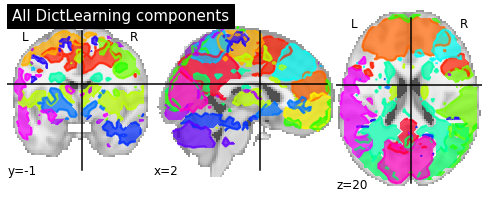

In [9]:
plotting.plot_prob_atlas(dictlearning_components_img, title='All DictLearning components')

In [15]:
fig = plt.figure(figsize=(10, 7))
plt.subplots_adjust(hspace=0.4)
for n in range(n_displayed):
    ax = plt.subplot(n_displayed, 4, 4 * n + 1)
    max_precision = precisions[n].max()
    plotting.plot_matrix(precisions[n], vmin=-max_precision,
                         vmax=max_precision, axes=ax, colorbar=False)

    if n == 0:
        plt.title("ground truth")
    plt.ylabel("subject %d" % n)

NameError: name 'n_displayed' is not defined

<Figure size 720x504 with 0 Axes>

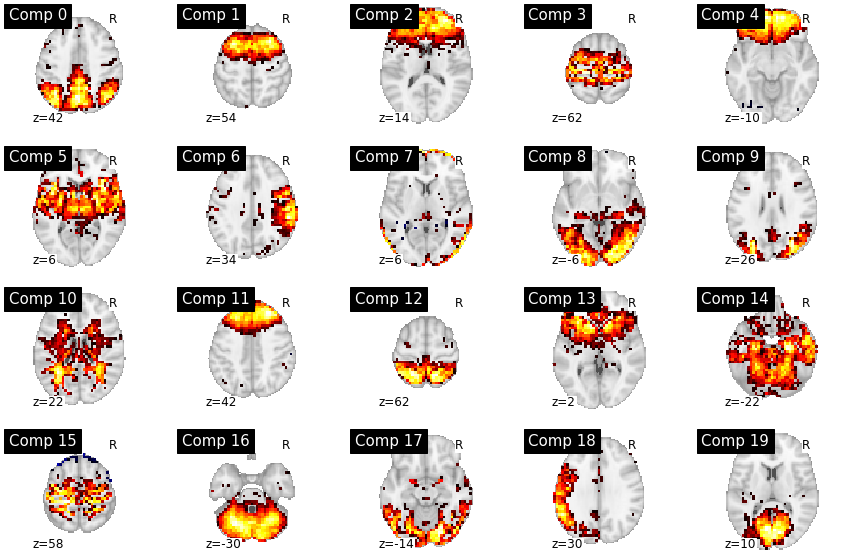

In [21]:
fig = plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace=0.2)
for i, cur_img in enumerate(image.iter_img(dictlearning_components_img)):
    ax = plt.subplot(4, 5, i+1)
    plotting.plot_stat_map(cur_img, display_mode="z", title="Comp %d" % i,
                  cut_coords=1, axes=ax, colorbar=False)

In [22]:
scores = dict_learning.score(func_filenames, per_component=True)

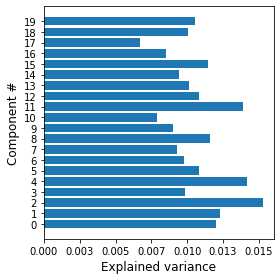

In [23]:
plt.figure(figsize=(4, 4))
positions = np.arange(len(scores))
plt.barh(positions, scores)                                            #bar plot. y-xais: position, x-xais:scores
plt.ylabel('Component #', size=12)
plt.xlabel('Explained variance', size=12)                              
plt.yticks(np.arange(20))                                              #set the current tick location
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.3f'))        #get the current axes,creating one if necessary
plt.tight_layout()

# Producing single subject maps of seed-to-voxel correlation

In [5]:
dataset = datasets.fetch_development_fmri(n_subjects=1)
func_filename = dataset.func[0]
confound_filename = dataset.confounds[0]

In [6]:
# Time series extraction
pcc_coords = [(0, -52, 18)]               # Posterior Cingulate Cortex (PCC), considered part of the Default Mode Network
seed_masker = NiftiSpheresMasker(
    pcc_coords, radius=8,
    detrend=True, standardize=True,
    low_pass=0.1, high_pass=0.01, t_r=2)
seed_time_series = seed_masker.fit_transform(func_filename, confounds=[confound_filename])

In [7]:
brain_masker = NiftiMasker(
    smoothing_fwhm=6,
    detrend=True, standardize=True,
    low_pass=0.1, high_pass=0.01, t_r=2)
brain_time_series = brain_masker.fit_transform(func_filename, confounds=[confound_filename])

In [39]:
print("Seed time series shape: (%s, %s)" % seed_time_series.shape)
print("Brain time series shape: (%s, %s)" % brain_time_series.shape)

Seed time series shape: (168, 1)
Brain time series shape: (168, 32504)


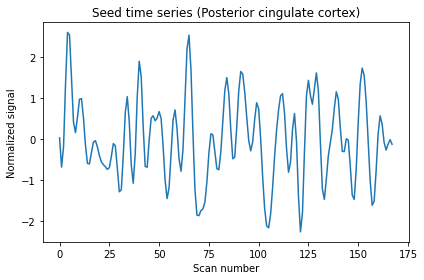

In [8]:
# seed time series
plt.plot(seed_time_series)
plt.title('Seed time series (Posterior cingulate cortex)')
plt.xlabel('Scan number')
plt.ylabel('Normalized signal')
plt.tight_layout()

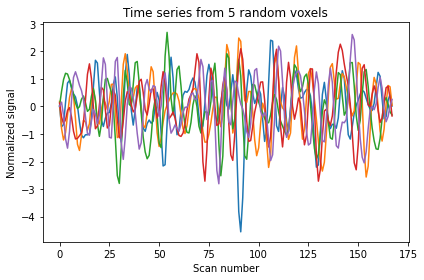

In [45]:
# 5 random voxels from the brain-wide data 
plt.plot(brain_time_series[:, [10, 45, 100, 5000, 10000]])
plt.title('Time series from 5 random voxels')
plt.xlabel('Scan number')
plt.ylabel('Normalized signal')
plt.tight_layout()

In [9]:
#Performing the seed-to-voxel correlation analysis
seed_to_voxel_correlations = (np.dot(brain_time_series.T, seed_time_series)/seed_time_series.shape[0])
print("Seed-to-voxel correlation shape: (%s, %s)" %
      seed_to_voxel_correlations.shape)
print("Seed-to-voxel correlation: min = %.3f; max = %.3f" % (
    seed_to_voxel_correlations.min(), seed_to_voxel_correlations.max()))

Seed-to-voxel correlation shape: (32504, 1)
Seed-to-voxel correlation: min = -0.646; max = 0.960


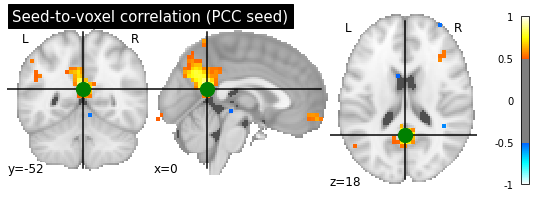

In [10]:
# Plotting the seed-to-voxel correlation map
seed_to_voxel_correlations_img = brain_masker.inverse_transform(seed_to_voxel_correlations.T)
display = plotting.plot_stat_map(seed_to_voxel_correlations_img,
                                 threshold=0.5, vmax=1,
                                 cut_coords=pcc_coords[0],
                                 title="Seed-to-voxel correlation (PCC seed)"
                                 )
display.add_markers(marker_coords=pcc_coords, marker_color='g',
                    marker_size=200)
# At last, we save the plot as pdf.
display.savefig('pcc_seed_correlation.pdf')

In [11]:
seed_to_voxel_correlations_fisher_z = np.arctanh(seed_to_voxel_correlations)
print("Seed-to-voxel correlation Fisher-z transformed: min = %.3f; max = %.3f"
      % (seed_to_voxel_correlations_fisher_z.min(),
         seed_to_voxel_correlations_fisher_z.max()))
# Finally, we can tranform the correlation array back to a Nifti image object, that we can save.

Seed-to-voxel correlation Fisher-z transformed: min = -0.768; max = 1.941


In [12]:
seed_to_voxel_correlations_fisher_z_img = brain_masker.inverse_transform(
    seed_to_voxel_correlations_fisher_z.T)
seed_to_voxel_correlations_fisher_z_img.to_filename(
    'pcc_seed_correlation_z.nii.gz')